RNN은 시간 개념이 들어가있는 데이터. 좀 더 어려운 용어로는 시계열 데이터를 다루는 데에 적합하다.
이번에는 RNN을 이용해서 이전의 주가의 흐름으로부터 다음 주가가 어떻게 될 것인지를 예측하는 코드를 구현해보고자 하였다


finance-datareader 설치

In [2]:
pip install -U finance-datareader # finance-datareader 설치


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df = fdr.DataReader('005930', '2018-05-04', '2020-01-01') # 삼성전자 종목에 대한 데이터를 2018년 5월 4일부터 2020년 1월 1일까지 로드
df.head()
print(df.shape)

(406, 6)


In [5]:
# MinMaxScaler는 데이터의 값의 범위를 줄여주는 기법으로 머신 러닝과 데이터 분석에서 자주 사용되는 방법입니다. 이를 사용하면 값의 범위가 0~1 사이로 변환됩니다.
# 숫자 단위가 클수록 계산에 소요되는 시간이 늘어남. 시간 소요를 줄이기 위해서 삼성전자 데이터에 MinMaxScaler를 적용.
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)
dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx
dfx.describe() # 통계치 확인

,Open,High,Low,Volume
count,406.000000,406.000000,406.000000,406.000000
mean,0.444773,0.455734,0.461344,0.115183
std,0.187798,0.185463,0.188430,0.084674
min,0.000000,0.000000,0.000000,0.000000
25%,0.328005,0.338198,0.347258,0.062716
50%,0.433504,0.440355,0.449086,0.098905
75%,0.510870,0.521574,0.531984,0.143973
max,1.000000,1.000000,1.000000,1.000000


In [6]:
# 두 데이터를 리스트 형태로 저장
X = dfx.values.tolist()
y = dfy.values.tolist()


In [7]:
# 이전 7일 동안의 OHLV 데이터를 이용하여 다음 날의 종가를 예측
window_size = 7 

data_X = [] 
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # _X : 이전 7일 동안의 OHLV 데이터, 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # -Y : 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.9846547314527638, 0.9949238578629699, 0.9999999999947781, 0.18874090968374152], [0.9999999999948849, 0.9999999999949238, 0.9738903394205018, 0.1654236914411064], [0.9539641943685219, 0.9593908629392924, 0.9791122715353571, 0.13013527827853805], [0.9539641943685219, 0.9543147208073385, 0.9530026109610809, 0.09194820685695666], [0.9283887467983202, 0.9187817258836609, 0.9373368146165152, 0.12629238039070007], [0.8823529411719573, 0.9035532994877992, 0.9164490861570942, 0.08866108851619439], [0.9335038363123606, 0.9796954314671081, 0.9738903394205018, 0.13381706813578303]] -> [0.9532467532418013]


In [8]:
# 7일간의 OHLVC 데이터
data_X[0]

[[0.7953964194332716,
  0.8274111675084903,
  0.780678851170858,
  0.5950598479352758],
 [0.7749360613771102,
  0.7918781725848127,
  0.7859007832857133,
  0.3164647972944813],
 [0.7749360613771102,
  0.771573604056997,
  0.7336814621371609,
  0.19838973885875907],
 [0.7289002557507472,
  0.7157360406055039,
  0.7180156657925952,
  0.16076499691679247],
 [0.7442455242928683,
  0.7411167512652735,
  0.7493472584817266,
  0.10000013878410015],
 [0.693094629152465,
  0.6852791878137803,
  0.6814621409886086,
  0.17775773908379244],
 [0.6521739130401423,
  0.6497461928901028,
  0.6396866840697666,
  0.24207018961868487]]

In [9]:
# data_X[0]을 넣었을 때의 정답인 data_y[0]
data_y[0]

[0.6441558441524978]

In [10]:
# 학습에 사용할 훈련 데이터와 테스트 데이터를 8:2로 분리
train_size = int(len(data_y) * 0.8)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (319, 7, 4) (319, 1)
테스트 데이터의 크기 : (80, 7, 4) (80, 1)


In [11]:
# 모델 준비
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()
# 7일치의 데이터를 다루고 있기 때문에 데이터의 길이는 7로 설정 , 4차원 데이터(숫자 4개)를 7번 넣기 때문에 입력의 차원은 4로 설정
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(7, 4)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 20)             2000      
                                                                 
 dropout (Dropout)           (None, 7, 20)             0         
                                                                 
 lstm_1 (LSTM)               (None, 20)                3280      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 학습 시작

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=70, batch_size=30)
pred_y = model.predict(test_X)

Epoch 1/70
11/11 [==============================] - 3s 9ms/step - loss: 0.1474
Epoch 2/70
11/11 [==============================] - 0s 8ms/step - loss: 0.0969
Epoch 3/70
11/11 [==============================] - 0s 9ms/step - loss: 0.0412
Epoch 4/70
11/11 [==============================] - 0s 9ms/step - loss: 0.0107
Epoch 5/70
11/11 [==============================] - 0s 9ms/step - loss: 0.0112
Epoch 6/70
11/11 [==============================] - 0s 10ms/step - loss: 0.0097
Epoch 7/70
11/11 [==============================] - 0s 9ms/step - loss: 0.0081
Epoch 8/70
11/11 [==============================] - 0s 9ms/step - loss: 0.0078
Epoch 9/70
11/11 [==============================] - 0s 10ms/step - loss: 0.0077
Epoch 10/70
11/11 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 11/70
11/11 [==============================] - 0s 9ms/step - loss: 0.0071
Epoch 12/70
11/11 [==============================] - 0s 9ms/step - loss: 0.0065
Epoch 13/70
11/11 [============================

3/3 [==============================] - 0s 5ms/step


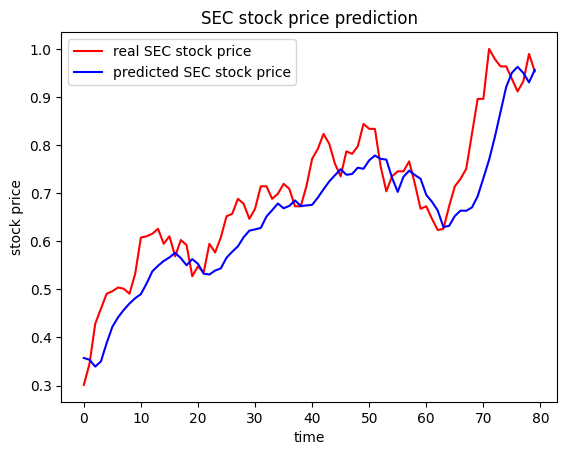

내일 SEC 주가 : [55989.] KRW


In [13]:
#테스트 데이터에 대해서 주가를 예측해보고 이를 시각화

pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

# df.Close[-1] : dfy.Close[-1] = y : pred_y[-1]
print("내일 SEC 주가 :", df.Close[-1] * pred_y[-1] / dfy.Close[-1], 'KRW')  #2020년 1월 2일의 삼성전자 주가의 예측값. 실제 주가 : 55200